<h2>1.파일에서 테이터 읽기</h2>

In [1]:
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from matplotlib import rc
rc('font', family = 'AppleGothic')

In [2]:
dir = os.getcwd()+"/data"
os.getcwd()
dir

'/Users/quan/some_ipynbs/data'

In [3]:
CCTV_in_Seoul = pd.read_csv(dir+"/01. CCTV_in_Seoul.csv")
CCTV_in_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
population_in_Seoul = pd.read_excel(dir+"/01. population_in_Seoul.xls", header  = 2 , usecols = "B,D,G,J,N")
population_in_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [5]:
population_in_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

<h2>2.데이터를 손보기</h2>

In [6]:
population_in_Seoul.index

RangeIndex(start=0, stop=27, step=1)

In [7]:
population_in_Seoul.rename(columns = {population_in_Seoul.columns[0] : "구역",
                                      population_in_Seoul.columns[1] : "총인구",
                                      population_in_Seoul.columns[2] : "한국인",
                                      population_in_Seoul.columns[3] : "외국인",
                                      population_in_Seoul.columns[4] : "노인"
                                     }, inplace = True)
population_in_Seoul.head()

,구역,총인구,한국인,외국인,노인
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
population_in_Seoul.index

RangeIndex(start=0, stop=27, step=1)

In [9]:
CCTV_in_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
CCTV_in_Seoul["최근3년 증가율"] = (CCTV_in_Seoul["2014년"]+CCTV_in_Seoul["2015년"]+CCTV_in_Seoul["2016년"])/CCTV_in_Seoul["2013년도 이전"]*100

In [11]:
population_in_Seoul.head()

,구역,총인구,한국인,외국인,노인
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
population_in_Seoul.drop([0], inplace=True)

In [13]:
population_in_Seoul.head()

,구역,총인구,한국인,외국인,노인
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [14]:
population_in_Seoul.구역.unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [15]:
population_in_Seoul[population_in_Seoul.구역.isnull()]

,구역,총인구,한국인,외국인,노인
26,NaN,NaN,NaN,NaN,NaN


In [16]:
population_in_Seoul.drop([26], inplace = True)

In [17]:
population_in_Seoul["외국인비율"] = population_in_Seoul["외국인"]/population_in_Seoul["총인구"]*100
population_in_Seoul["노인비율"] = population_in_Seoul["노인"]/population_in_Seoul["총인구"]*100

In [18]:
CCTV_in_Seoul.sort_values(by = "최근3년 증가율", ascending=False).head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [19]:
population_in_Seoul.sort_values(by = "외국인비율", ascending = True).head()

,구역,총인구,한국인,외국인,노인,외국인비율,노인비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [20]:
population_in_Seoul.head()

,구역,총인구,한국인,외국인,노인,외국인비율,노인비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [21]:
CCTV_in_Seoul.rename(columns ={CCTV_in_Seoul.columns[0]:"구역"},inplace = True)

In [22]:
pd.merge(population_in_Seoul, CCTV_in_Seoul, on = "구역").head()

,구역,총인구,한국인,외국인,노인,외국인비율,노인비율,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,464,314,211,630,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,413,190,72,348,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,730,91,241,265,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,573,78,53,174,53.228621


In [23]:
result = pd.merge(population_in_Seoul, CCTV_in_Seoul, on = "구역")

In [24]:
result.head()

,구역,총인구,한국인,외국인,노인,외국인비율,노인비율,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,464,314,211,630,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,413,190,72,348,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,730,91,241,265,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,573,78,53,174,53.228621


In [25]:
result.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [26]:
result.set_index("구역",inplace = True)

In [27]:
result.head()

,총인구,한국인,외국인,노인,외국인비율,노인비율,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율
구역,,,,,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,464,314,211,630,248.922414
중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,413,190,72,348,147.699758
용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374
성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,730,91,241,265,81.780822
광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,573,78,53,174,53.228621


In [28]:
result.sort_values(by= "소계", ascending = False).head()

,총인구,한국인,외국인,노인,외국인비율,노인비율,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율
구역,,,,,,,,,,,,
강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,2780,1292,430,584,932,150.619195
양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,2034,1843,142,30,467,34.671731
서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,1930,1406,157,336,398,63.371266
은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,1873,1138,224,278,468,85.237258
용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374


In [29]:
result.index

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object', name='구역')

In [30]:
result.columns

Index(['총인구', '한국인', '외국인', '노인', '외국인비율', '노인비율', '소계', '2013년도 이전', '2014년',
       '2015년', '2016년', '최근3년 증가율'],
      dtype='object')

In [31]:
import numpy as np

In [32]:
np.corrcoef(result["소계"],result["총인구"])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [33]:
x = np.corrcoef(result["소계"],result["총인구"])

In [34]:
상관계수리스트 = [(np.corrcoef(result[i],result["소계"])[0][1], i) for i in result.columns[0:6]]
상관계수리스트


[(0.30634227936792635, '총인구'),
 (0.30428726365177655, '한국인'),
 (-0.023786186776062028, '외국인'),
 (0.2551959796166759, '노인'),
 (-0.13607432878194445, '외국인비율'),
 (-0.28078553790050065, '노인비율')]

In [35]:
상관계수리스트.sort(key = lambda x:abs(x[0]),reverse = True)
상관계수리스트

[(0.30634227936792635, '총인구'),
 (0.30428726365177655, '한국인'),
 (-0.28078553790050065, '노인비율'),
 (0.2551959796166759, '노인'),
 (-0.13607432878194445, '외국인비율'),
 (-0.023786186776062028, '외국인')]

In [36]:
np.corrcoef(result["한국인"],result['총인구'])

array([[1.        , 0.99806125],
       [0.99806125, 1.        ]])

## 3.그래프 작성

In [37]:
CCTV_in_Seoul.sort_values(by = "소계", ascending = False).head()

,구역,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374


In [38]:
population_in_Seoul.sort_values(by = "총인구", ascending = False).head()

,구역,총인구,한국인,외국인,노인,외국인비율,노인비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [39]:
result.sort_values(by = '소계', ascending=False).head()

,총인구,한국인,외국인,노인,외국인비율,노인비율,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율
구역,,,,,,,,,,,,
강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,2780,1292,430,584,932,150.619195
양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,2034,1843,142,30,467,34.671731
서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,1930,1406,157,336,398,63.371266
은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,1873,1138,224,278,468,85.237258
용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374


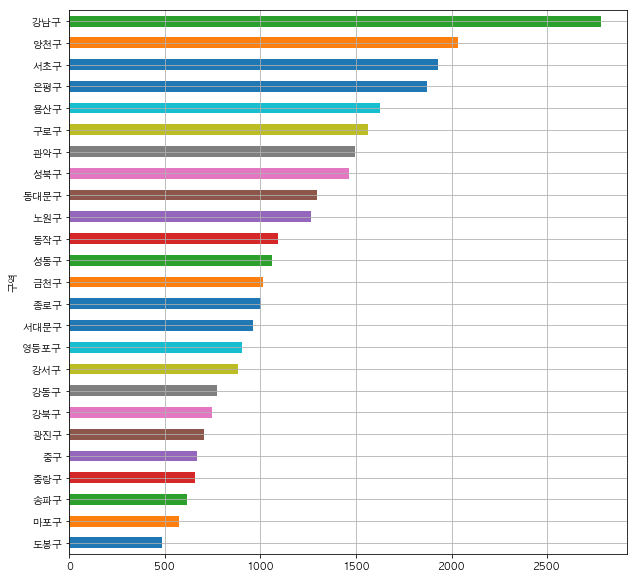

In [40]:
result['소계'].sort_values(ascending = True).plot(kind = "barh", figsize = (10,10), grid = True)

In [41]:
result['CCTV비율'] = result['소계']/result['총인구']*100

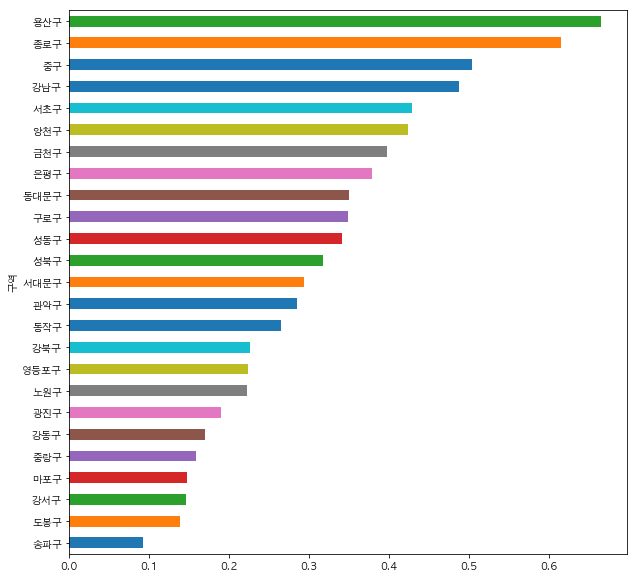

In [42]:
result['CCTV비율'].sort_values().plot(kind = 'barh', figsize = (10,10))

In [43]:
result.head()

,총인구,한국인,외국인,노인,외국인비율,노인비율,소계,2013년도 이전,2014년,2015년,2016년,최근3년 증가율,CCTV비율
구역,,,,,,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,464,314,211,630,248.922414,0.615404
중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,413,190,72,348,147.699758,0.503603
용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374,0.665020
성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,730,91,241,265,81.780822,0.341211
광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,573,78,53,174,53.228621,0.189970


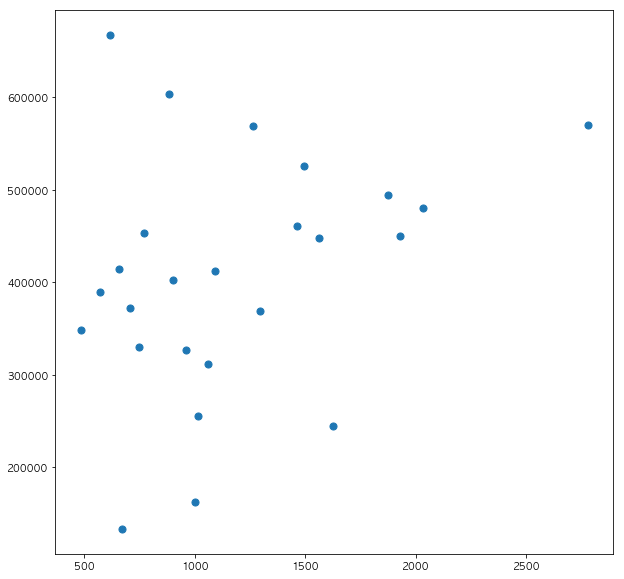

In [49]:
plt.figure(figsize = (10,10))
plt.scatter(result['소계'], result['총인구'], marker = 'o', s = 50)
plt.show()